# Foundations of Nonlinear Optimization

We describe derivatives and gradients in terms of optimizing nonlinear functions before, subsequently, explaining how gradients are used to train neural networks.  Training neural networks is, indeed, an instance of optimizing a nonlinear function.

# Plotting Functions in 3 Dimensions

We are familiar most likely with plotting a 3D graph as a surface as shown in the first cell below.  For demonstrating nonlinear optimization with gradients another view may provide a clearer picture of the mechanism, namely a contour plot or level sets, as shown in the second cell.

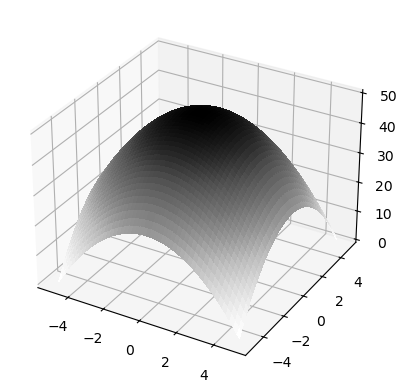

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = np.arange(-5, 5, 0.05)
y = np.arange(-5, 5, 0.05)
x, y = np.meshgrid(x, y)
z = 50 - x**2 - y**2

# Plot the surface.
ax.plot_surface(x, y, z, cmap=cm.Greys, linewidth=2, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter('{x:.0f}')
plt.savefig(f'symm_contour.jpg', dpi=600)

plt.show()

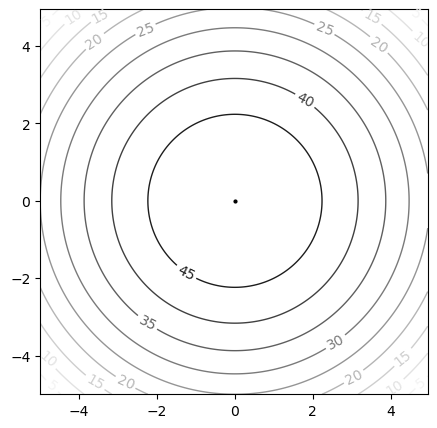

In [3]:
fig, ax = plt.subplots()
cp = ax.contour(x, y, z, 10, linewidths=1, cmap=cm.Greys)
ax.clabel(cp, inline=True, fontsize=10)
ax.scatter(0, 0, s=4, c='k')
fig.set_size_inches(5,5)
plt.show()

# Derivatives

A derivative is the slope of a function at a particular point.  The derivative of lines are easily understood since lines have a constant slope.  For example, the derivative of 

$y = f \left( x \right) = 2x + 5$ 

is 

$y^\prime = f^\prime \left( x \right) = \frac{dy}{dx} = 2$ 

and, more generally, the derivative of 

$y = mx +b$ 

is 

$f^\prime \left( x \right) = m$.  

The slopes (derivatives) of nonlinear functions vary.  Consider, for example, this parabola:

$f \left( x \right) = - \left( x - 2 \right)^2 = -x^2 + 4x - 4$.




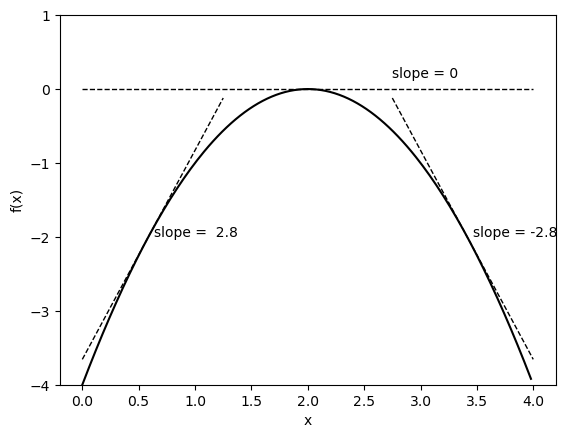

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -(x-2)**2

def f_prime(x):
    return -2*x +4

def b_calc(m,x,y):
    return y-m*x
    
x = np.arange(0,4,0.02)
fig, ax = plt.subplots()
ax.plot(x,[f(z) for z in x], c='k')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.set_ylim(-4,1)
''' Draw tangent lines and slopes '''
ax.plot(np.arange(0, 4.01, 0.5), [0 for _ in range(9)], c='k', linestyle='dashed', linewidth=1)
ax.text(2.75,0.15,'slope = 0')
x = 2-np.sqrt(2)
m = f_prime(x) 
b = b_calc(m,2-np.sqrt(2),-2)
ax.plot(np.arange(0,1.251,0.25),[m*x+b for x in np.arange(0,1.251,0.25)], c='k', linestyle='dashed', linewidth=1)
ax.text(x+0.05,m*x+b,f'slope = {m: .1f}')
x = 2+np.sqrt(2)
m = f_prime(x) 
y = -2
b = b_calc(m,x,y)
ax.plot(np.arange(2.75,4.01,0.25),[m*x+b for x in np.arange(2.75,4.01,0.25)], c='k', linestyle='dashed', linewidth=1)
ax.text(x+0.05,m*x+b,f'slope = {m: .1f}')

plt.show()

For the types of functions we are considering in this notebook, $ f \left( x\right) = a x^b$, where $a,b$ are constant coefficients and $x$ is a variable,   derivatives can be computed by this formula for :

$f^\prime \left( x \right) = abx^{b-1}$

The derivative of the parabola above is

$f^\prime \left( x \right) = -2x +4$

and so the derivatives for the points shown above are verified below.

In [5]:
import numpy as np

def f_prime(x):
    return -2*x + 4

pt = [2-np.sqrt(2), 2.0, 2+np.sqrt(2)]
for p in pt:
    print(f'x = {p: 0.2f};  slope = {f_prime(p):0.2}')

x =  0.59;  slope = 2.8
x =  2.00;  slope = 0.0
x =  3.41;  slope = -2.8


# Gradients

We have noted that gradients are vectors that point in the direction of greatest increase for the function.  The variables <code>x</code> and <code>y</code> are the inputs and <code>z</code> is the output or function value.  So, we are interested in which direction, in terms of <code>x</code> and <code>y</code>, causes the function value to increase most quickly.

The gradient for our function is a direction indicated by a vector where each component direction is the partial derivative of the function, that is, the derivative of each input variable individually, as shown below.

$f \left( x , y \right) = 50 - x^2 - y^2$

$\nabla f \left( x , y \right) = \left[ \begin{array}{c}
                                          \partial_{x} f \left( x , y \right) \\  
                                          \partial_{y} f \left( x , y \right)  
                                        \end{array}  
                                 \right] = 
                                 \left[ \begin{array}{c}
                                          -2x \\  
                                          -2y  
                                        \end{array}  
                                 \right]$

Improving the function value from a current point $x_0$ by taking a step of size $\alpha$ in the direction of the gradient is done as follows:

$\left( x_1 , y_1 \right) = \left( x_0 , y_0 \right) + \alpha \frac{\nabla f \left( x , y \right)}{\left| \nabla f \left( x , y \right) \right|_2} $

It has been proven that if one takes a sufficiently small step $\alpha$ then the function value improves, that is:

$ f \left( x_1 , y_1 \right) > f \left( x_0 , y_0 \right)$

Optimization by gradient search is, then, taking a number of steps as defined above.  One can use a default step size $\alpha$ and, if that step size does not result in an increased function value, then the step size can be reduce until the step does result in an increased function value, such as redefining $\alpha$ using $\alpha = \frac{\alpha}{2}$.

# Gradient Search

We will see in this section how a gradient-based algorithm can find the optimal (maximum) value of the parabola defined previously.

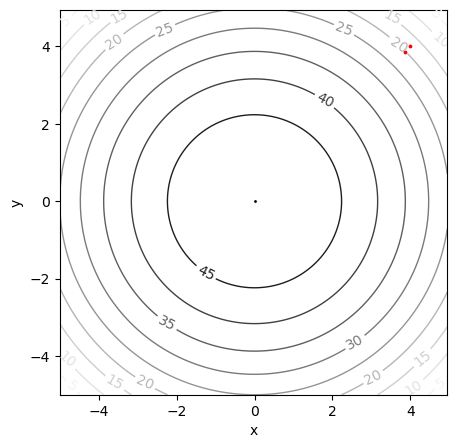

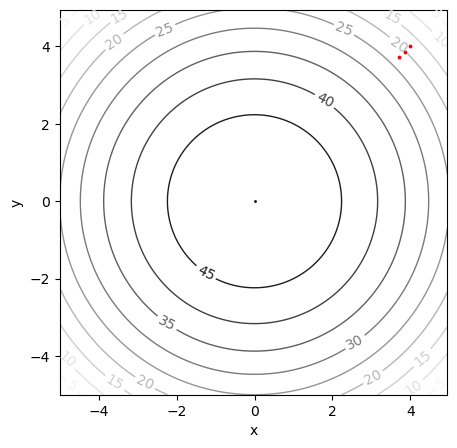

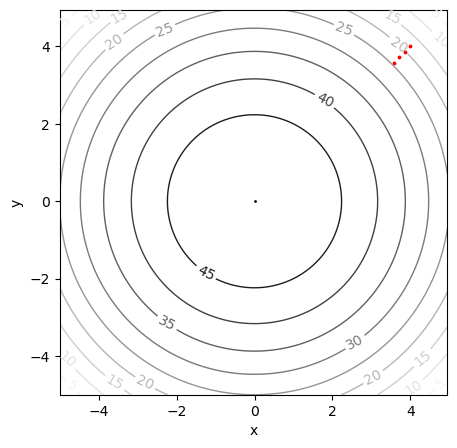

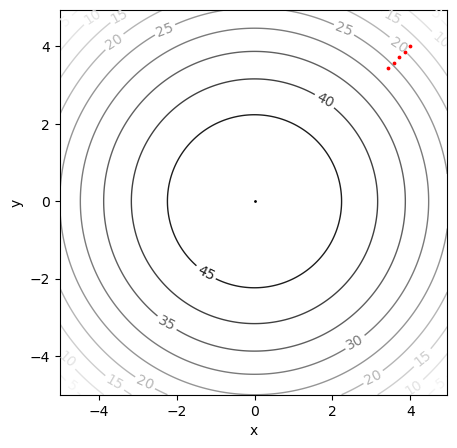

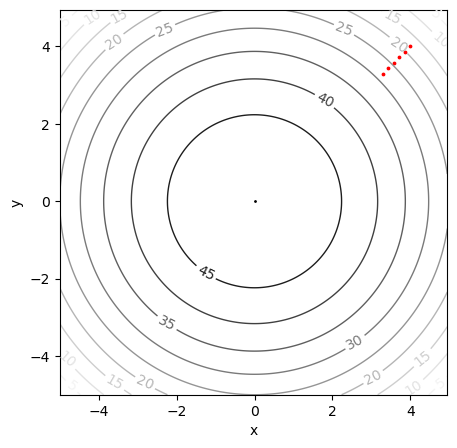

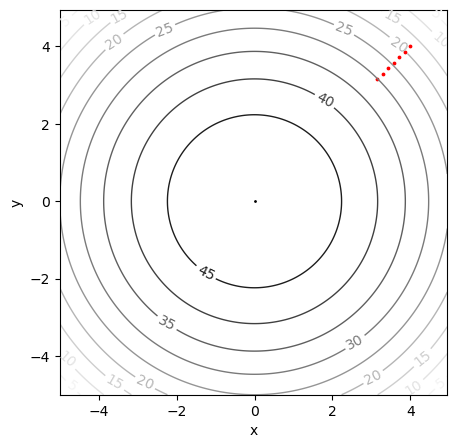

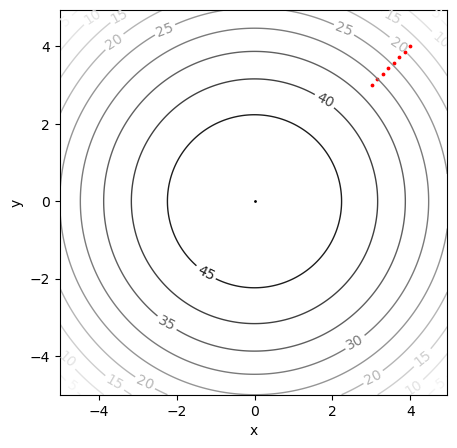

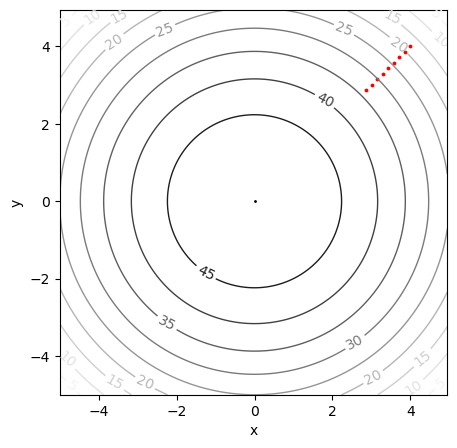

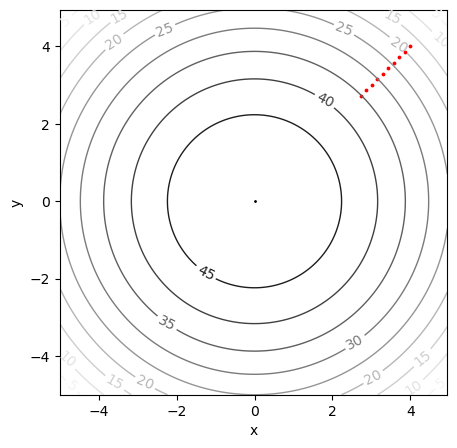

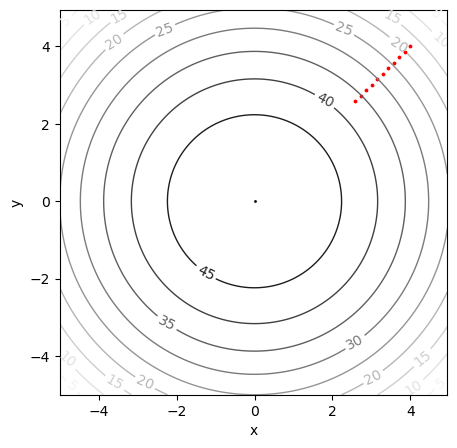

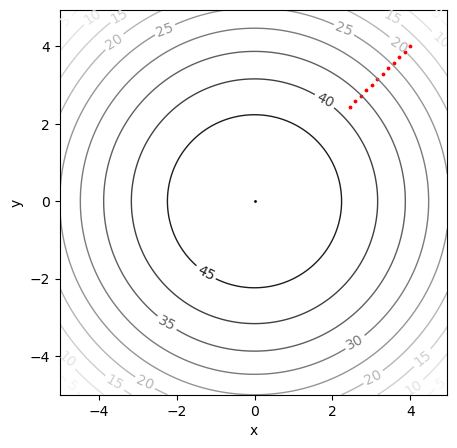

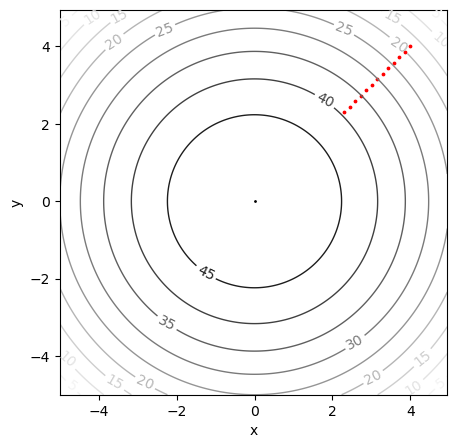

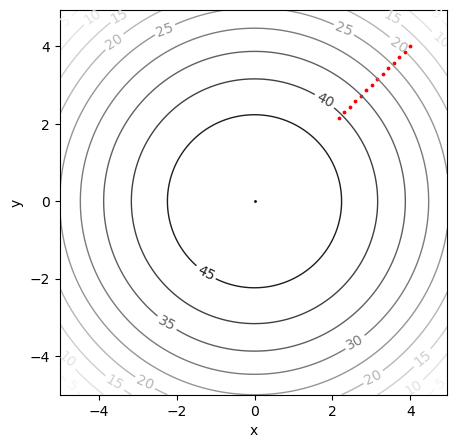

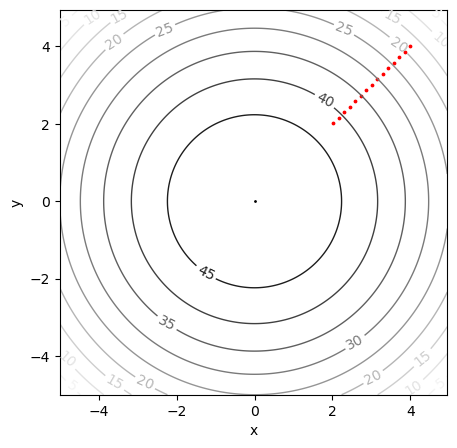

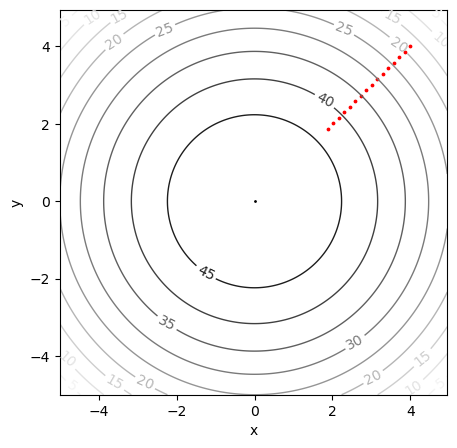

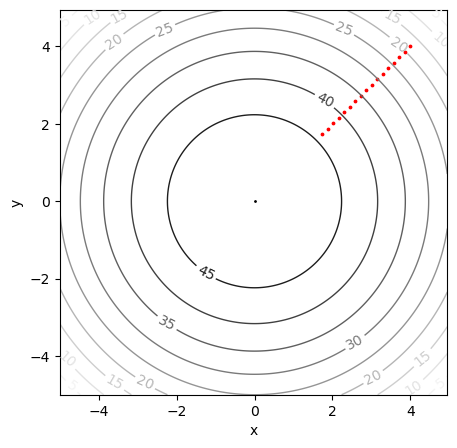

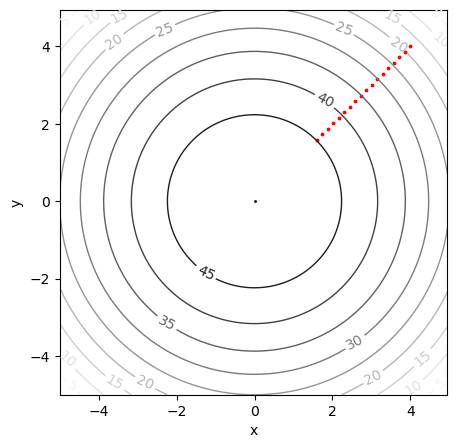

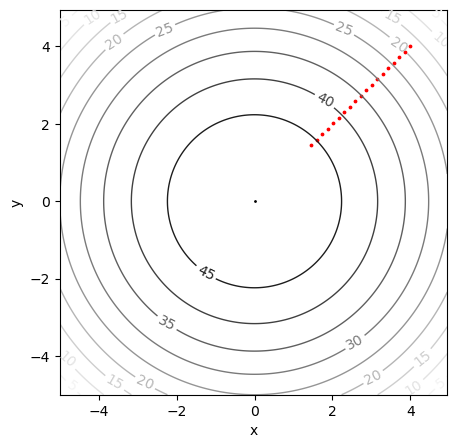

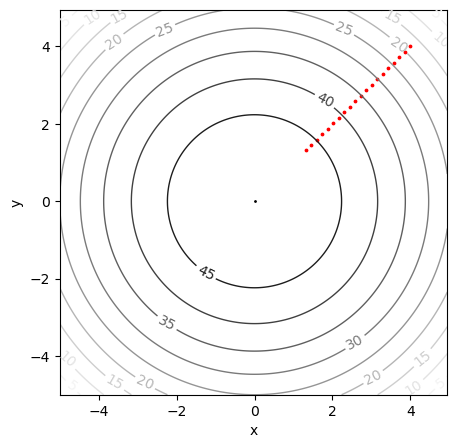

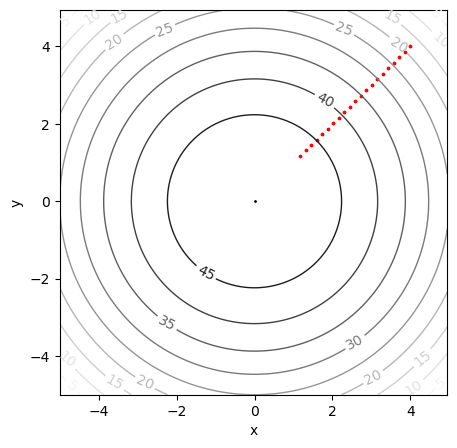

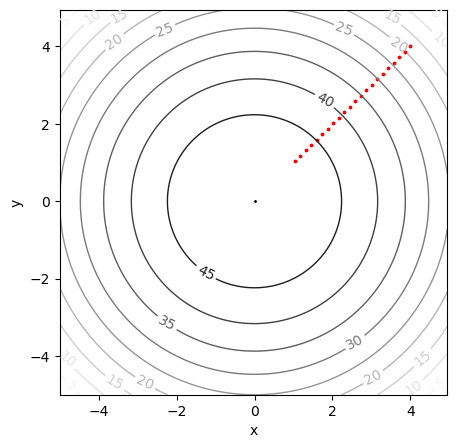

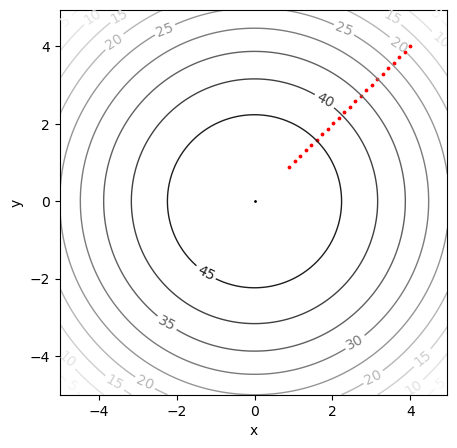

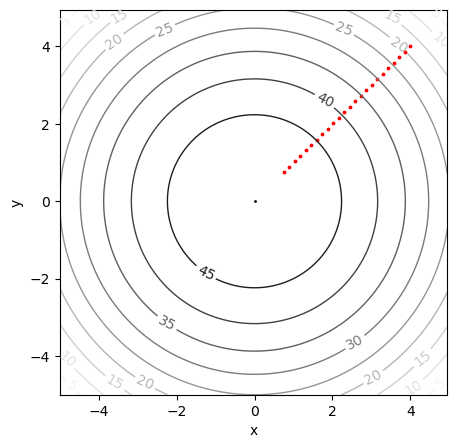

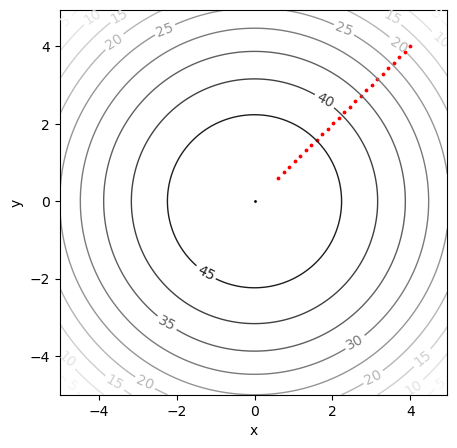

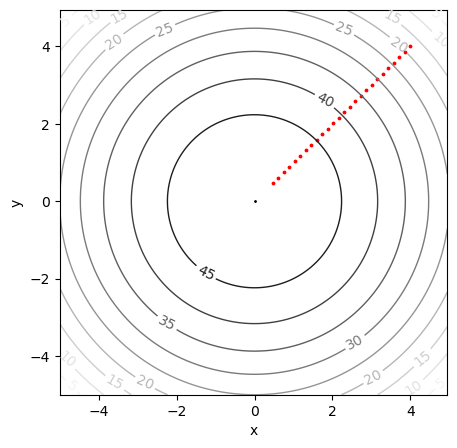

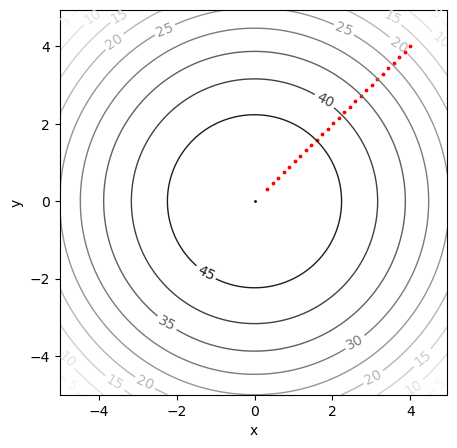

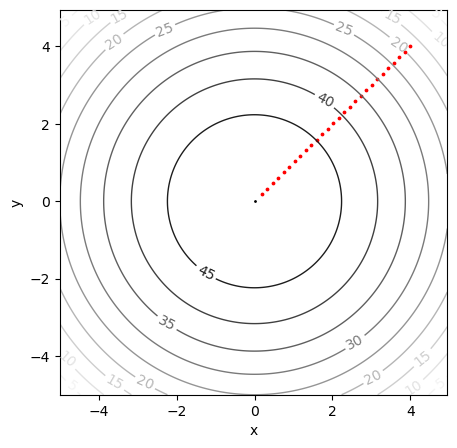

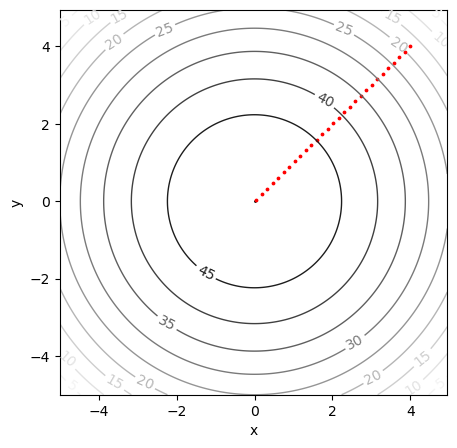

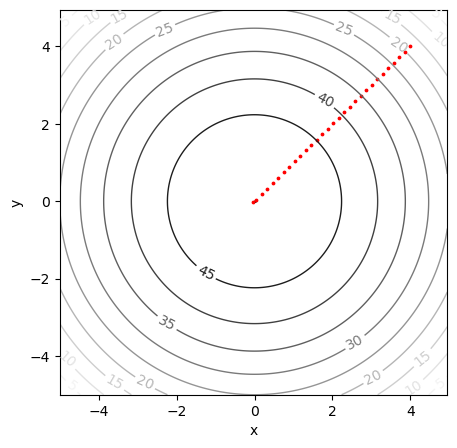

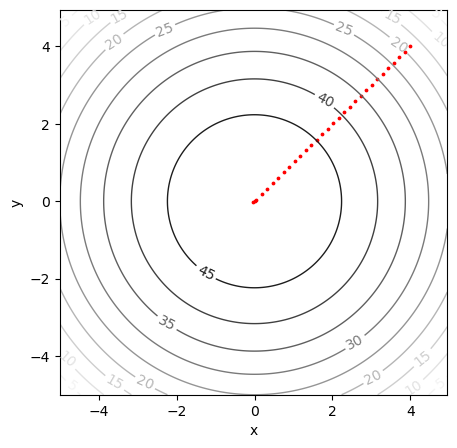

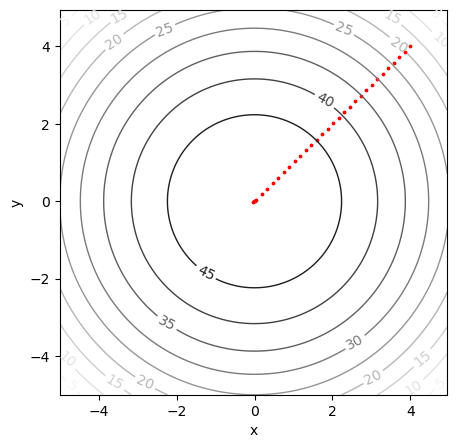

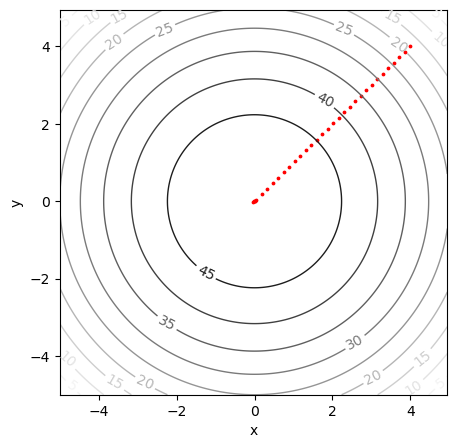

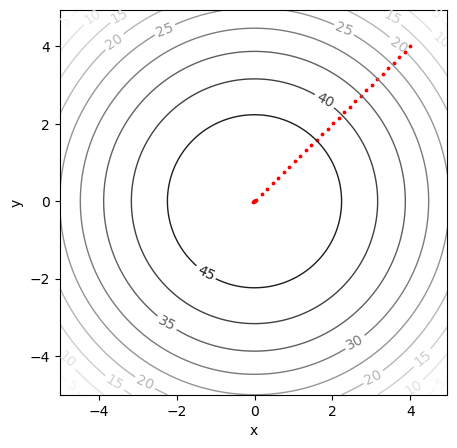

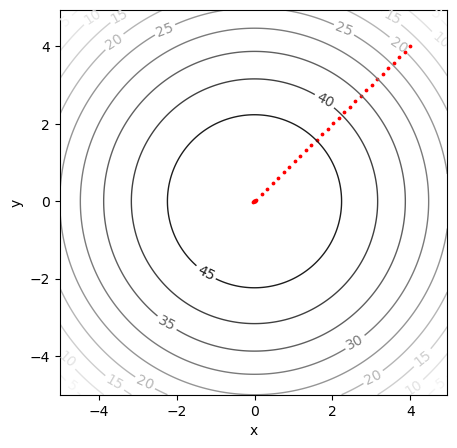

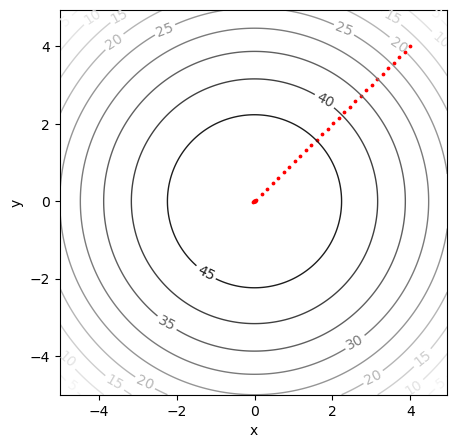

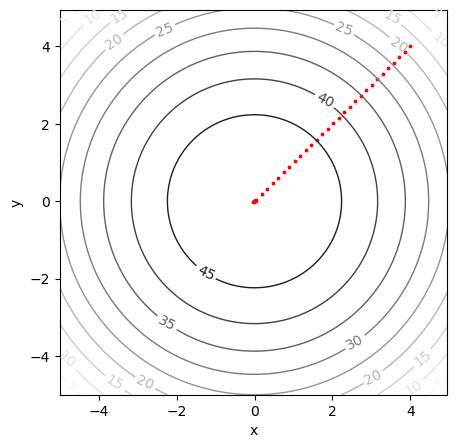

Final position: [1.02212465e-09 1.02212465e-09]; f(x,y) = 50.0
[array([4, 4]), array([3.85857864, 3.85857864]), array([3.71715729, 3.71715729]), array([3.57573593, 3.57573593]), array([3.43431458, 3.43431458]), array([3.29289322, 3.29289322]), array([3.15147186, 3.15147186]), array([3.01005051, 3.01005051]), array([2.86862915, 2.86862915]), array([2.72720779, 2.72720779]), array([2.58578644, 2.58578644]), array([2.44436508, 2.44436508]), array([2.30294373, 2.30294373]), array([2.16152237, 2.16152237]), array([2.02010101, 2.02010101]), array([1.87867966, 1.87867966]), array([1.7372583, 1.7372583]), array([1.59583694, 1.59583694]), array([1.45441559, 1.45441559]), array([1.31299423, 1.31299423]), array([1.17157288, 1.17157288]), array([1.03015152, 1.03015152]), array([0.88873016, 0.88873016]), array([0.74730881, 0.74730881]), array([0.60588745, 0.60588745]), array([0.46446609, 0.46446609]), array([0.32304474, 0.32304474]), array([0.18162338, 0.18162338]), array([0.04020203, 0.04020203]),

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def grad(x,y):
    return np.array([-2*x , -2*y])

def f(x,y):
    return 50 - x**2 - y**2

def length(x):
    return np.sqrt((x**2).sum())

def graph(path, i, dpi):
    ''' Make data '''
    x = np.arange(-5, 5, 0.05)
    y = np.arange(-5, 5, 0.05)
    x, y = np.meshgrid(x, y)
    z = 50 - x**2 - y**2

    ''' create graph '''
    fig, ax = plt.subplots()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    cp = ax.contour(x, y, z, 10, linewidths=1, cmap=cm.Greys)
    ax.clabel(cp, inline=True, fontsize=10)
    ax.scatter(0, 0, s=1, c='k')
    ax.scatter(*zip(*path), s=3, c='r') #plot gradient search progress
    fig.set_size_inches(5,5)
    plt.savefig(f'symm_{i}.jpg', dpi=dpi)
    plt.show()


path = []
pos = np.array([4,4])
path.append(pos)

alpha = 0.2
done = False
i = 0
while not done:
    g = grad(*pos)
    max_alpha = 50
    counter = 0
    while f(*(pos + alpha * g / length(g))) <= f(*pos) and counter < max_alpha:
        counter += 1
        alpha = alpha/2
    if counter == max_alpha:
        done = True
    else:
        pos = pos + alpha * g / length(g)
        path.append(pos)
        graph(path, i, 600)
        i += 1

print(f'Final position: {pos}; f(x,y) = {f(*pos)}')
print(path)

[https://youtu.be/iwh2316bsRc?si=IuwZvp6P7KjaveZ4](https://youtu.be/iwh2316bsRc?si=IuwZvp6P7KjaveZ4)

Let's optimize a slightly more interesting function... one that is not symmetric.

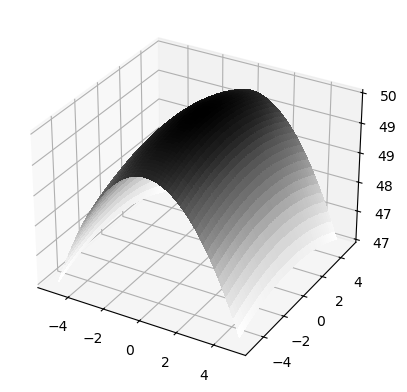

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = np.arange(-5, 5, 0.05)
y = np.arange(-5, 5, 0.05)
x, y = np.meshgrid(x, y)
z = 50 - (x/3)**2 - (y/8)**2

# Plot the surface.
ax.plot_surface(x, y, z, cmap=cm.Greys, linewidth=2, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter('{x:.0f}')
plt.savefig(f'elypt_contour.jpg', dpi=600)

plt.show()

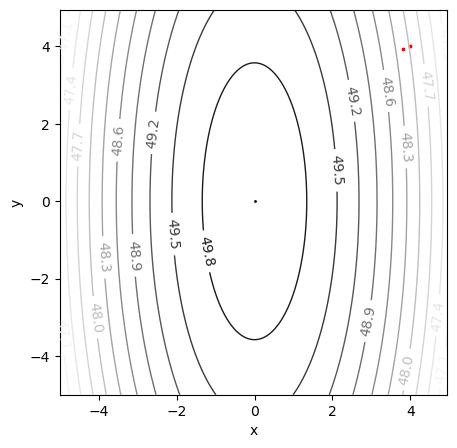

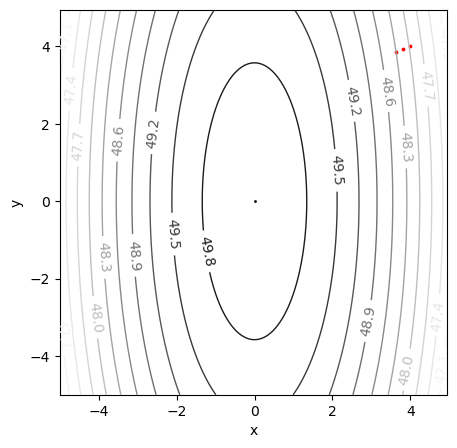

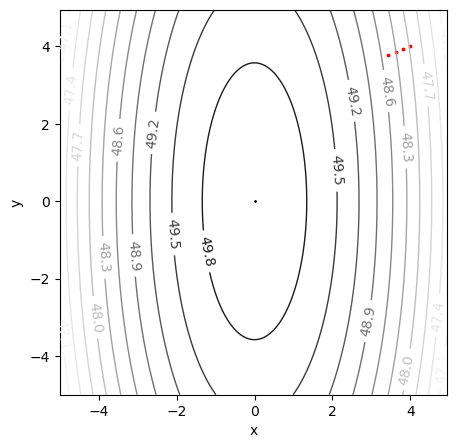

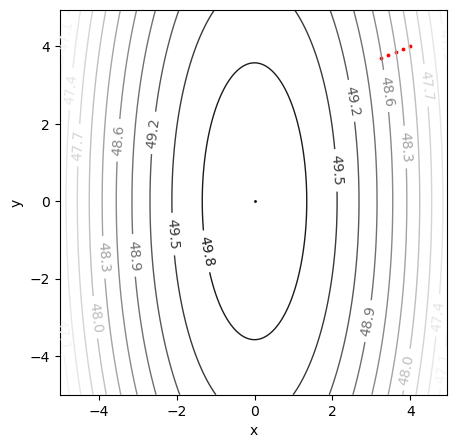

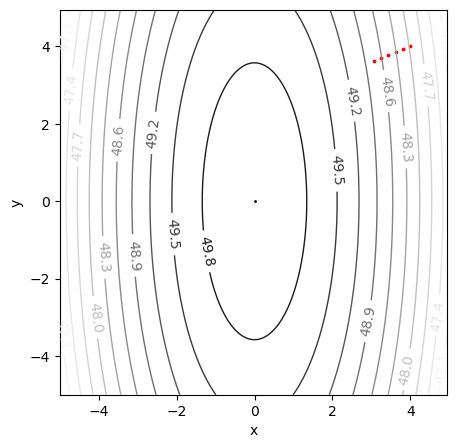

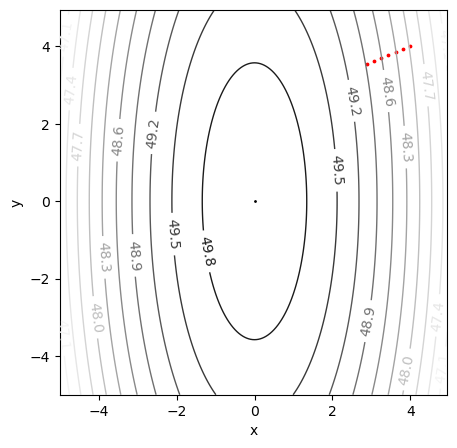

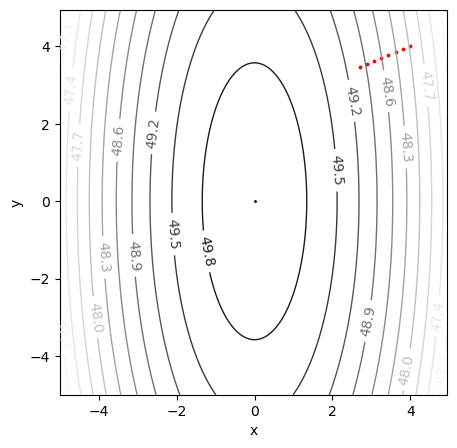

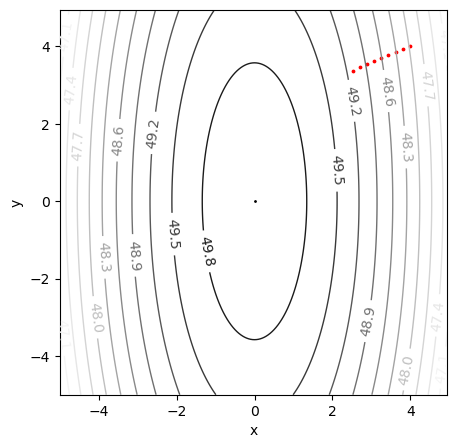

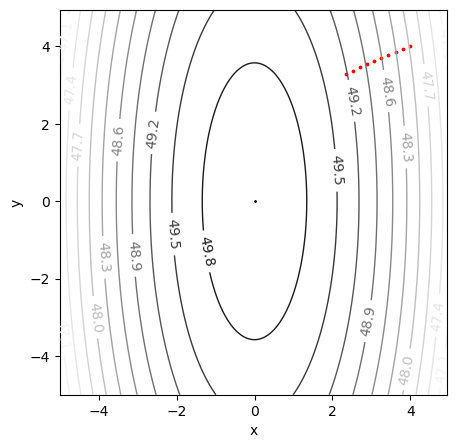

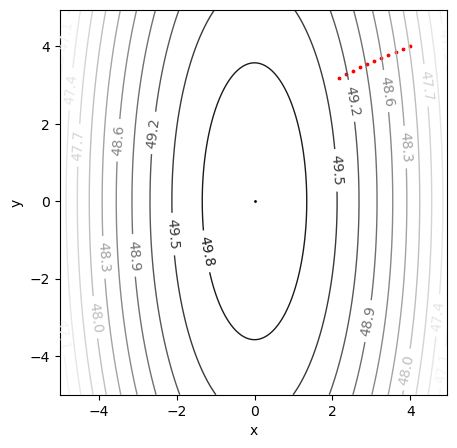

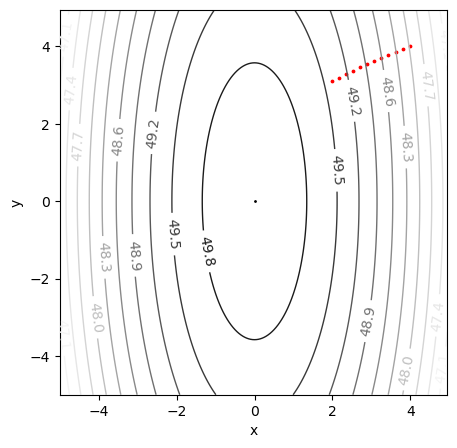

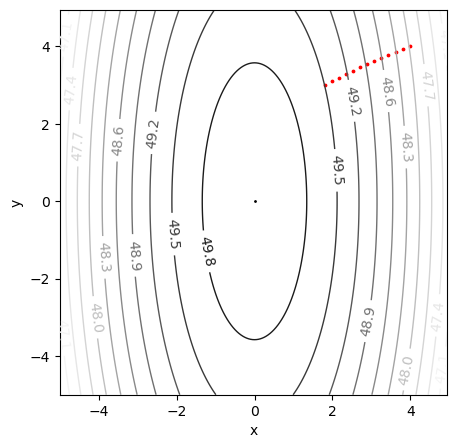

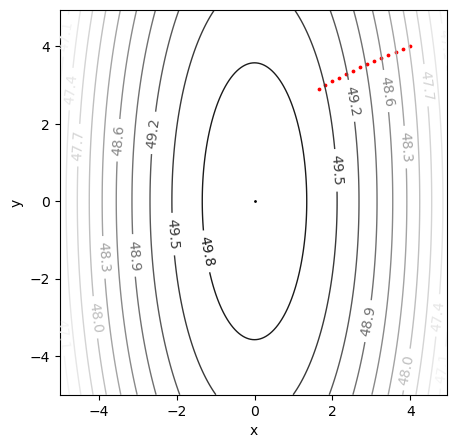

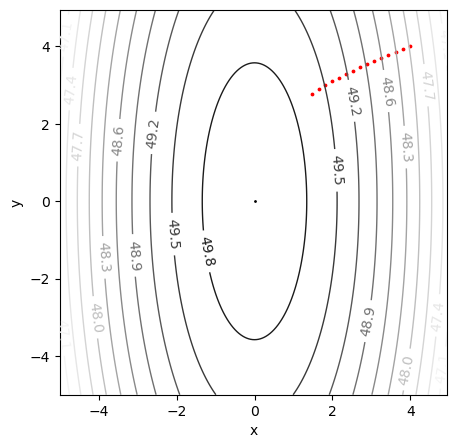

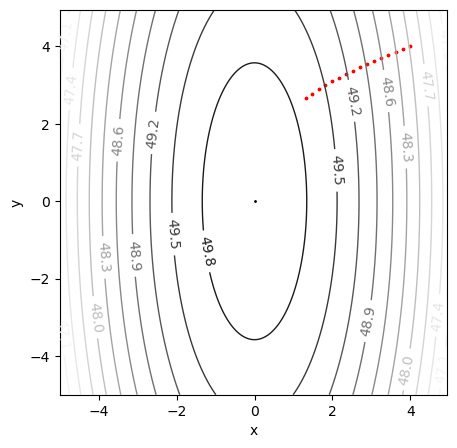

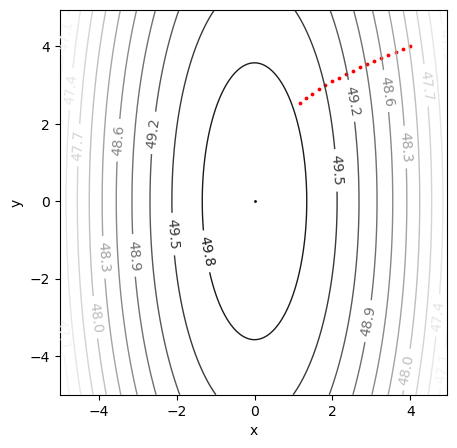

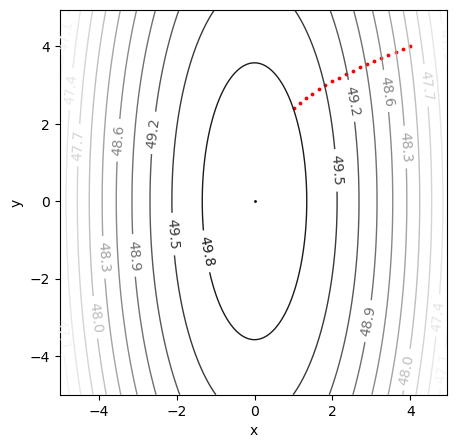

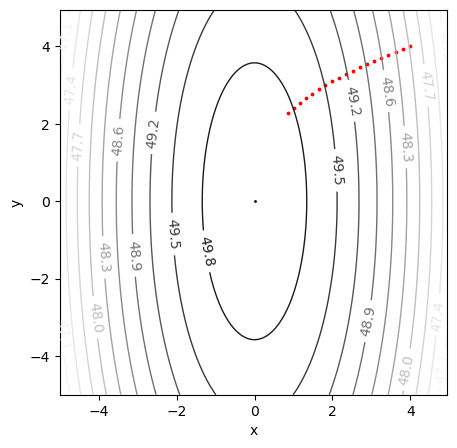

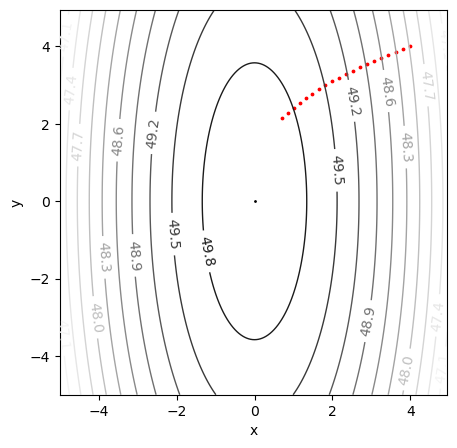

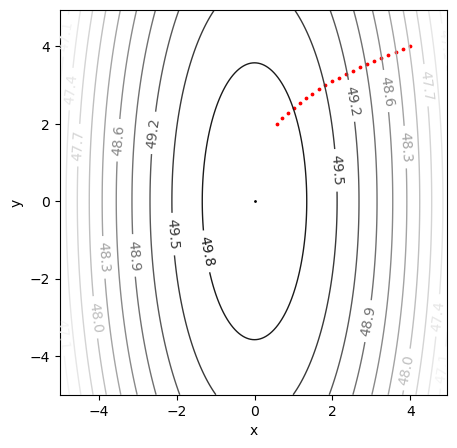

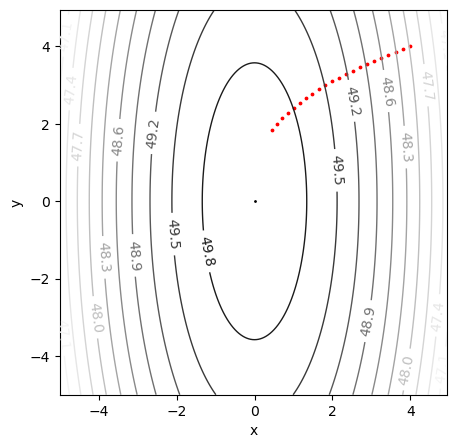

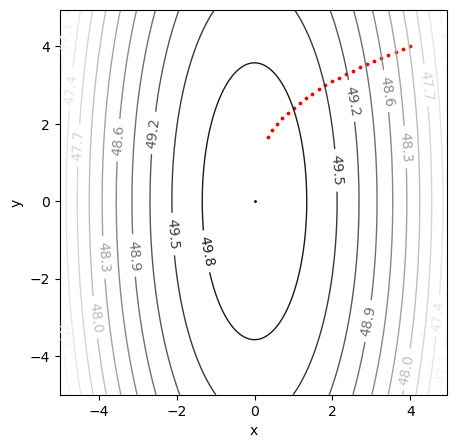

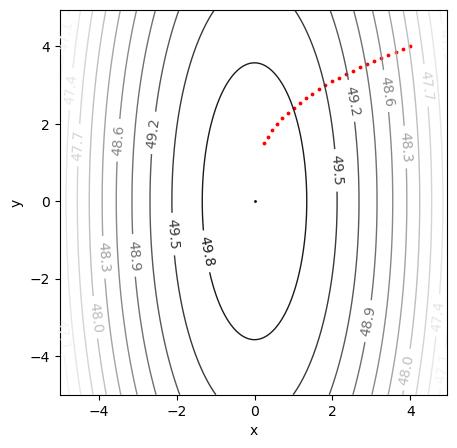

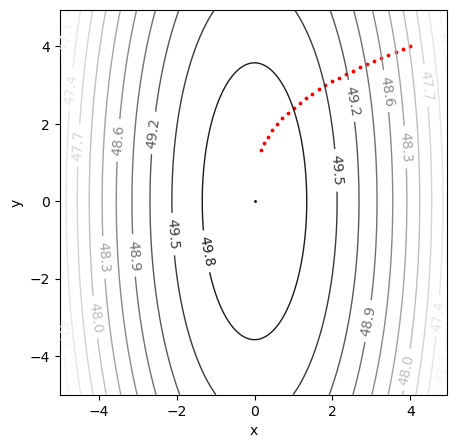

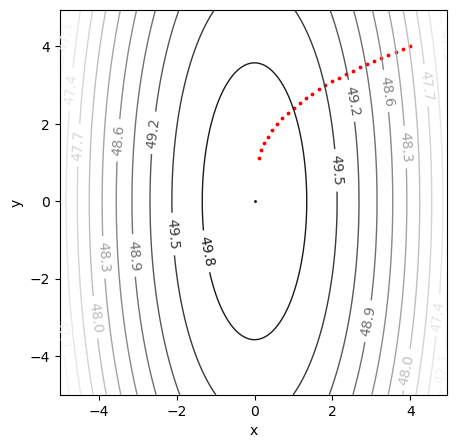

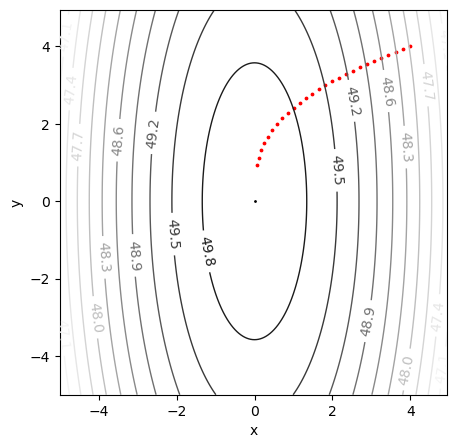

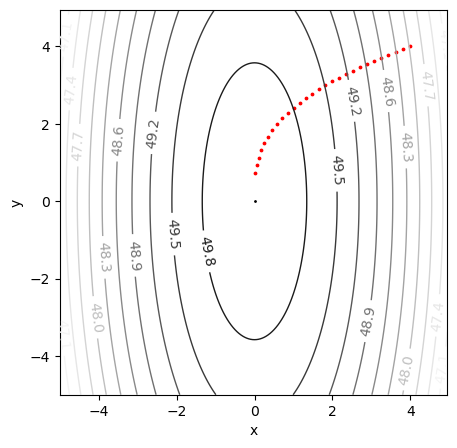

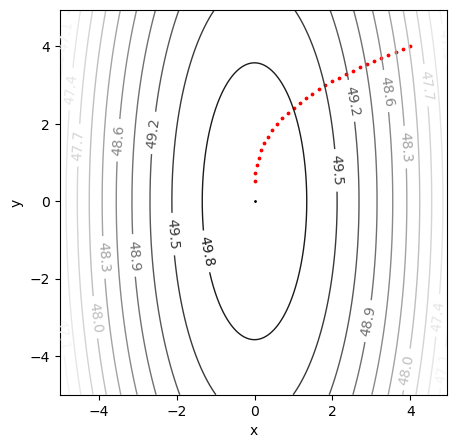

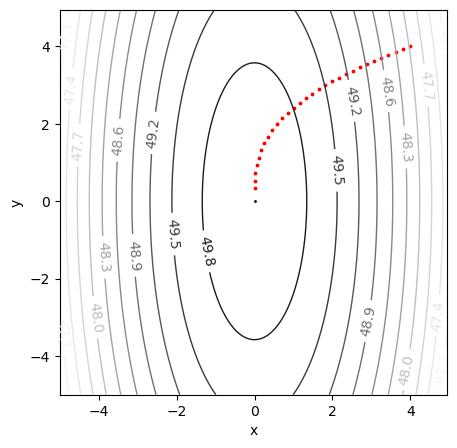

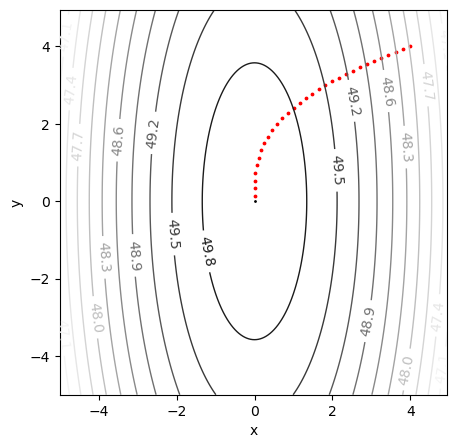

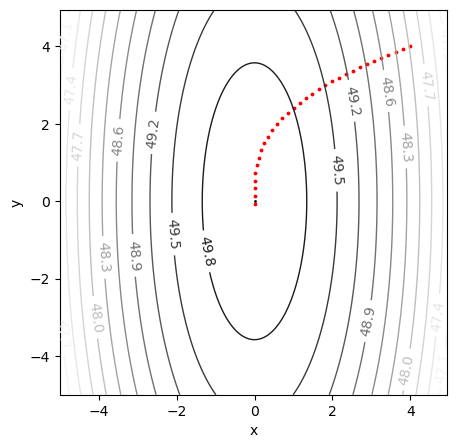

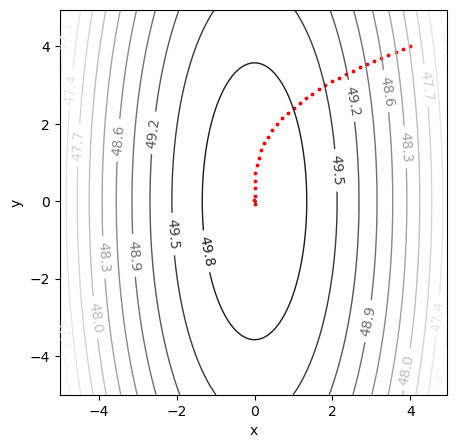

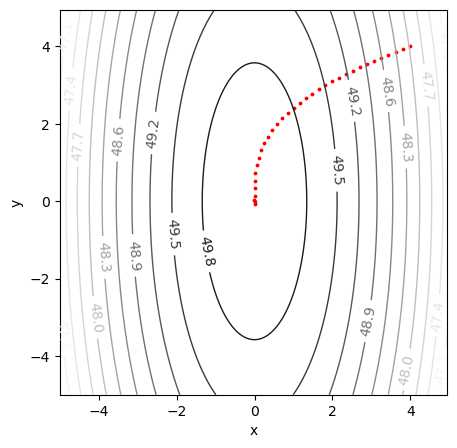

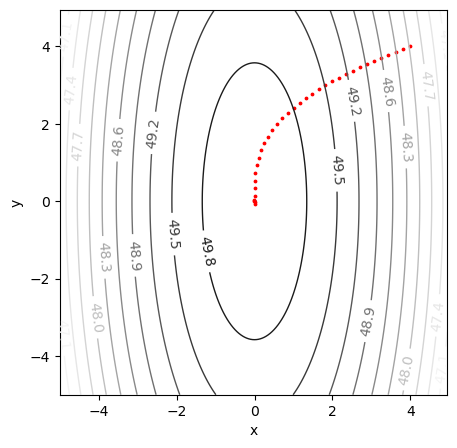

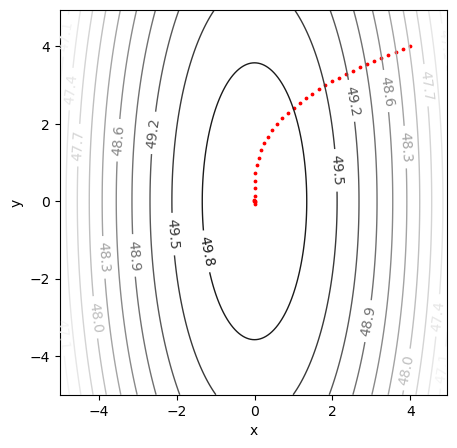

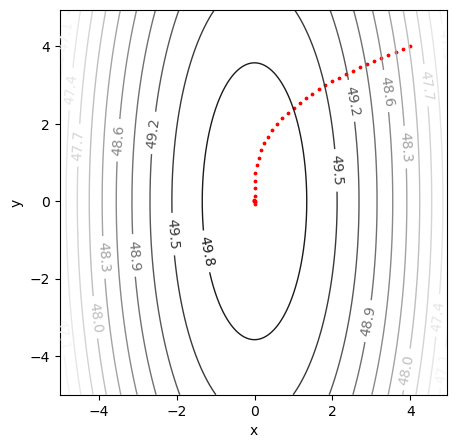

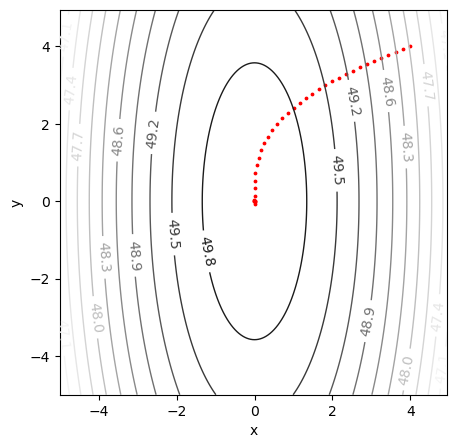

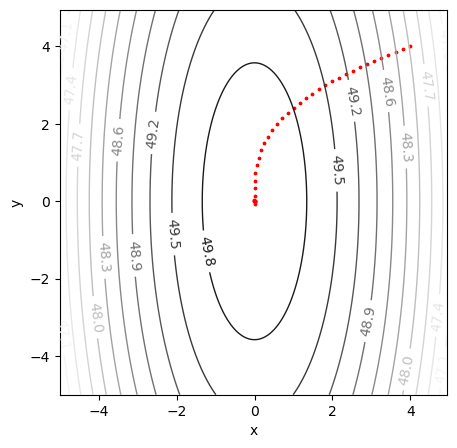

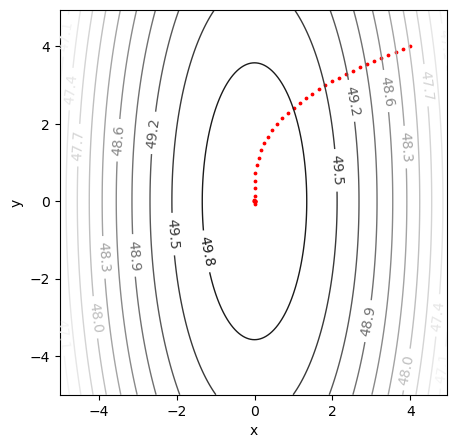

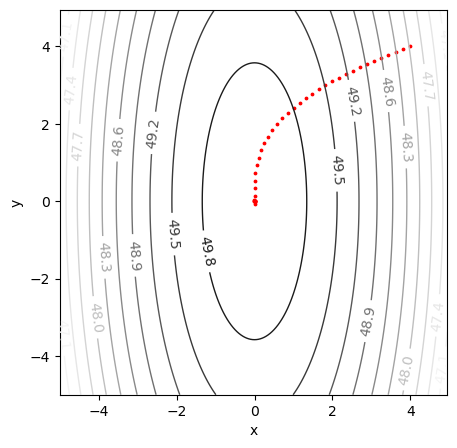

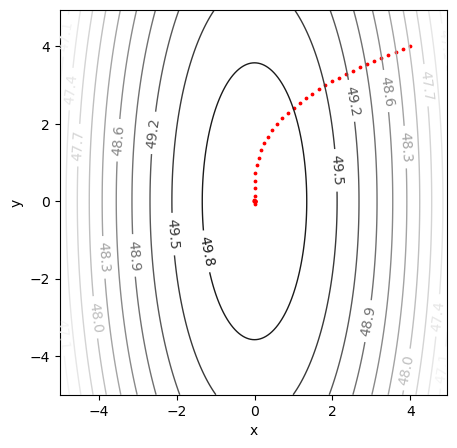

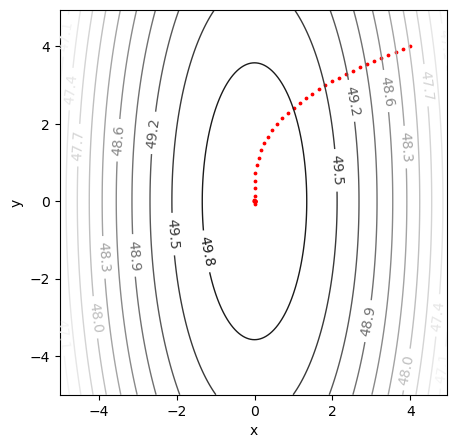

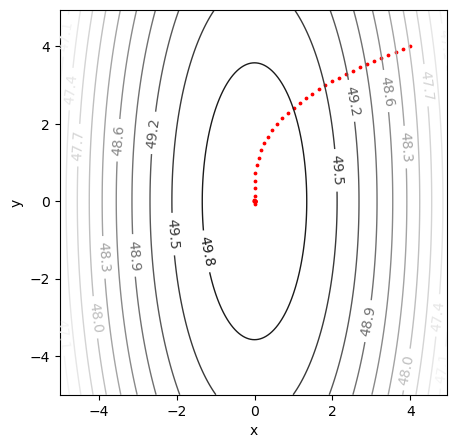

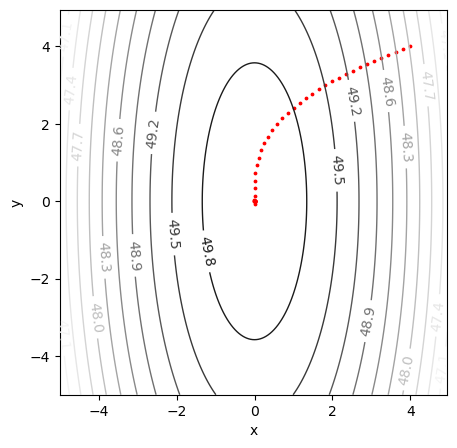

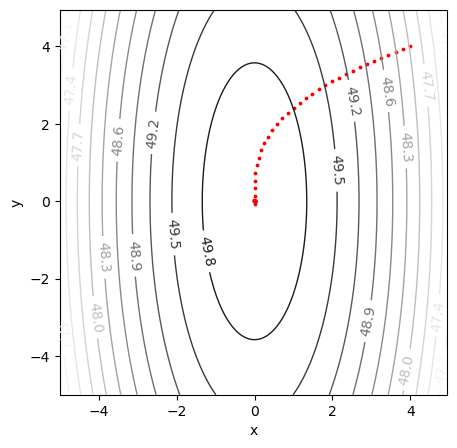

Final position: [ 9.80367946e-08 -1.55078369e-07]; f(x,y) = 50.0
[array([4, 4]), array([3.81273416, 3.92977531]), array([3.62618381, 3.85767145]), array([3.4404206 , 3.78356323]), array([3.25552649, 3.70731253]), array([3.0715957, 3.6287666]), array([2.88873705, 3.54775602]), array([2.70707693, 3.46409241]), array([2.5267629 , 3.37756581]), array([2.34796829, 3.28794166]), array([2.17089786, 3.19495746]), array([1.99579503, 3.09831897]), array([1.82295096, 2.99769627]), array([1.65271607, 2.89271968]), array([1.48551461, 2.78297602]), array([1.32186284, 2.66800603]), array([1.16239165, 2.54730418]), array([1.00787361, 2.42032317]), array([0.85925401, 2.28648665]), array([0.71768268, 2.14521543]), array([0.58453955, 1.99597432]), array([0.46143933, 1.83834712]), array([0.35019027, 1.67214349]), array([0.25267314, 1.49752845]), array([0.1706096 , 1.31513992]), array([0.10522366, 1.12613019]), array([0.05686838, 0.93206379]), array([0.02475024, 0.73465958]), array([0.00685463, 0.53546182]

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def grad(x,y):
    return np.array([-2*x/3 , -y/4])

def f(x,y):
    return 50 - (x/3)**2 - (y/8)**2

def length(x):
    return np.sqrt((x**2).sum())

def graph(path, i, dpi):
    ''' Make data '''
    x = np.arange(-5, 5, 0.05)
    y = np.arange(-5, 5, 0.05)
    x, y = np.meshgrid(x, y)
    z = 50 - (x/3)**2 - (y/8)**2

    ''' create graph '''
    fig, ax = plt.subplots()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    cp = ax.contour(x, y, z, 10, linewidths=1, cmap=cm.Greys)
    ax.clabel(cp, inline=True, fontsize=10)
    ax.scatter(0, 0, s=1, c='k')
    ax.scatter(*zip(*path), s=3, c='r') #plot gradient search progress
    fig.set_size_inches(5,5)
    plt.savefig(f'elypt_{i}.jpg', dpi=dpi)
    plt.show()


path = []
pos = np.array([4,4])
path.append(pos)

alpha = 0.2
done = False
i = 0
while not done:
    g = grad(*pos)
    max_alpha = 50
    counter = 0
    while f(*(pos + alpha * g / length(g))) <= f(*pos) and counter < max_alpha:
        counter += 1
        alpha = alpha/2
    if counter == max_alpha:
        done = True
    else:
        pos = pos + alpha * g / length(g)
        path.append(pos)
        graph(path, i, 600)
        i += 1

print(f'Final position: {pos}; f(x,y) = {f(*pos)}')
print(path)

[https://youtu.be/RYltN3V5SOw?si=pbIsCcsrQHFDHzl-](https://youtu.be/RYltN3V5SOw?si=pbIsCcsrQHFDHzl-)

# Neural Networks

Neural networks take input data and map them into categories, which is a _classification_ process.  In the image below MNIST images composed of 784 numerical values representing grayscale shades are mapped onto 10 categories representing the numerals 0 through 9.  These are the inputs into the neural network and the goal is to train the neural network so that each input of 784 pixels results in a correct classification among the digits at the output side of the neural network.

The circles in the diagrams are called neurons or perceptrons and each is represented by a mathematical function.  In the case of such a classification network the last output layer would have one neuron being coded as a 1, indicating the most likely characters, with the remaining neurons have values of 0.  This diagram is a simplification of a neural network that would do a good job of classifying MNIST characters, whereas a more reasonable network would have, for starters, more layers.

![neural_net](nn_mnist.jpg)

The connections among neurons in sucessive layers indicate where the output values from the first layer of neurons (formulas) serve as inputs to neurons (formulas) in the subsequent layer.

We will finish our discussion of gradients applied to neural networks using a PweroPoint presentation.

# Backup

This content is not essential for understanding gradients and neural networks but this code might be useful.

## Make Movies of the Gradient-Based Optimization Algorithm Path

First, compile all frames in a numpy array.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import numpy as np

root = ['symm_', 'elypt_']

for r in root:
    i = 0
    concat = []
    done = False
    while not done:
      try:
          img = np.array(Image.open(f'{r}{i}.jpg'))
          concat.append(img)
          print(f'{r}{i}.jpg', img.shape)
          i += 1
          
      except:
          done = True

    result = np.stack(concat)
    print(r, result.shape)
    np.savetxt(f'{r}shape.txt',np.array(result.shape).astype(np.int16))
    #np.savetxt(f'{r[:-1]}.txt',result.flatten().astype(np.int16))
    result = result.flatten().astype(np.int16)
    np.savez_compressed(f'{r[:-1]}',x=result)

Then, create mp4 files.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from PIL import Image

root = ['symm_', 'elypt_']

for r in root:
    m_shape = np.loadtxt(f'{r}shape.txt').astype(np.int32)
    
    size = m_shape[1:]
    fig,ax = plt.subplots()
    #ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.margins(0.0)
    ax.axis('off')
    start = np.zeros(size, dtype=np.int16)
    start.fill(255)
    img = ax.imshow(start)
    fps_val = 3
    
    #movie = np.loadtxt(f'{r[:-1]}.txt').reshape(*m_shape).astype(np.int16)
    loaded = np.load(f'{r[:-1]}.npz')
    movie = loaded['x'].reshape(*m_shape).astype(np.int16)
    
    def img_serve(i):
        if i % fps_val == 0:
            print( '.', end ='' )
        img.set_array(np.array(Image.open(f'{r}{i}.jpg')))
        yield [img]
    
    def animate_func(i):
        if i % fps_val == 0:
            print( '.', end ='' )
        #img.axes.set_xticks([])
        #img.axes.set_yticks([])
        #ax.margins(0.0)
        img.set_array(movie[i].reshape(*size)) # the variable movie refers to a numpy array of images
        return [img]


    anim = animation.FuncAnimation(fig, animate_func, frames=m_shape[0])   # , frames = nSeconds * fps, interval = 1000 / fps
    #anim = animation.FuncAnimation(fig, img_serve, frames=100)   # , frames = nSeconds * fps, interval = 1000 / fps
    plt.rcParams['animation.ffmpeg_path'] = r'C:\ProgramData\Anaconda3\envs\base_home\pkgs\ffmpeg-4.3.1-ha925a31_0\Library\bin\ffmpeg.exe'
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=fps_val, metadata=dict(artist='Me'), bitrate=1800)
    anim.save(f'{r}anim.mp4', writer = writer, dpi=600)